# 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # 내 드라이브에 있는 데이터를 읽을 때 사용(코랩에 구글 드라이브를 연결시켜주는 코드)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/랩실/[간호대]data/y2019_male.csv',encoding='cp949') 
#data = pd.read_csv('/content/drive/MyDrive/랩실/[간호대]data/y2020_male.csv',encoding='cp949') 
#data = pd.read_csv('/content/drive/MyDrive/랩실/[간호대]data/y2021_male.csv',encoding='cp949')

In [ ]:
data.columns

Index(['Unnamed: 0', 'S_SI', 'MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'bmi', 'WC_MN',
       'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT',
       'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT', 'AC_ACCESS',
       'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'SEX', 'S_EDU', 'MF', 'RF',
       'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM', 'F_CS', 'PA_VIG', 'PA_WLK',
       'PA_PE_FQ', 'PA_ST', 'O_BR_S', 'TC_AMNT', 'TC_QT_YR', 'PA_SWD_N',
       'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S'],
      dtype='object')

In [ ]:
data.set_index(keys='Unnamed: 0',inplace=True) #index를 Unnamed: 0으로 바꿔줌
data.dropna(inplace=True)

data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'남학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

In [ ]:
# 데이터 형식을 카테고리형으로 변경하기 (수치형 변수로 사용할 변수는 반드시 삭제!) (SEX, S_FAGE 삭제!!)
a = ['MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'bmi', 'WC_MN',
       'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT',
       'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT', 'AC_ACCESS',
       'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'S_EDU', 'MF', 'RF',
       'FN2', 'parents2', 'F_CS', 'PA_VIG', 'PA_WLK',
       'PA_PE_FQ', 'PA_ST', 'O_BR_S', 'TC_AMNT', 'TC_QT_YR']
# S_SI는 안 넣어도 됨

# 2019년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_WK_MM', 'INT_WD_MM'

# 2020년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_SPWD_TM', 'INT_SPWK_TM' 

# 2021년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_SPWD_TM', 'INT_SPWK_TM'

for i in a:
  data[i] = data[i].astype('category')

In [ ]:
#수치형 변수는 스케일링을 해야 함

# 2019년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_WK_MM', 'INT_WD_MM'

# 2020년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_SPWD_TM', 'INT_SPWK_TM' 

# 2021년 수치형 변수: 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S', 'INT_SPWD_TM', 'INT_SPWK_TM'

scaler= StandardScaler()

#공통
data['PA_SWD_N'] = scaler.fit_transform(data[['PA_SWD_N']])
data['PA_SWD_S'] = scaler.fit_transform(data[['PA_SWD_S']])
data['PA_SWK_N'] = scaler.fit_transform(data[['PA_SWK_N']])
data['PA_SWK_S'] = scaler.fit_transform(data[['PA_SWK_S']])

#년도별로 다름
data['INT_WK_MM'] = scaler.fit_transform(data[['INT_WK_MM']])
data['INT_WD_MM'] = scaler.fit_transform(data[['INT_WD_MM']])

In [ ]:
# columns에서 S_SI, SEX, S_FAGE 빼고 복붙

datas = data[['MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'bmi', 'WC_MN',
       'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT',
       'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT', 'AC_ACCESS',
       'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'S_EDU', 'MF', 'RF',
       'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM', 'F_CS', 'PA_VIG', 'PA_WLK',
       'PA_PE_FQ', 'PA_ST', 'O_BR_S', 'TC_AMNT', 'TC_QT_YR', 'PA_SWD_N',
       'PA_SWD_S', 'PA_SWK_N', 'PA_SWK_S']]

data_target = data['S_SI']

In [ ]:
# category 변수들을 더미변수로 변환
datas = pd.get_dummies(datas, columns = a)

In [ ]:
# 변환이 잘 되었는지 확인 # length가 너무 크면 수치형 변수가 더미 처리 된것임
datas.columns

Index(['INT_WK_MM', 'INT_WD_MM', 'PA_SWD_N', 'PA_SWD_S', 'PA_SWK_N',
       'PA_SWK_S', 'MH_0', 'MH_1', 'SCHOOL_0', 'SCHOOL_1',
       ...
       'TC_AMNT_1', 'TC_AMNT_2', 'TC_AMNT_3', 'TC_AMNT_4', 'TC_AMNT_5',
       'TC_AMNT_6', 'TC_AMNT_9999', 'TC_QT_YR_1', 'TC_QT_YR_2',
       'TC_QT_YR_9999'],
      dtype='object', length=200)

In [ ]:
#stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    datas, data_target, stratify=data_target, random_state=42) 

# [로지스틱 회귀]

모델 생성 및 정확도 출력

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 시키기
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)

#모델 정확도 출력
print("훈련 세트 정확도: {:.3f}".format(logistic.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(logistic.score(X_test, y_test)))

훈련 세트 정확도: 0.940
테스트 세트 정확도: 0.938


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


변수별 계수 시각화

계수의 부호로 인하여 내림차순으로 30개 오름차순으로 30개를 출력한 후 시각화를 진행

In [ ]:
visul = pd.DataFrame()

visul['col'] = datas.columns
visul['coef'] = logistic.coef_[0,]

visul.sort_values(by = 'coef', inplace = True, ascending=False) # 내림차순

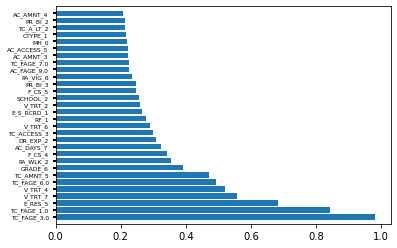

In [ ]:
n = 30 # 상위 몇개를 출력할 것인지
plt.rcParams["font.family"] = "Malgun Gothic"
n_features = datas[:n].shape[1]
plt.barh(range(n), visul['coef'][:n],align='center')
plt.yticks(np.arange(n), visul['col'][:n])
plt.tick_params(axis='y',  labelsize=6, width=2)
plt.ylim(-1, n)
plt.savefig('logistic_coef_decending_male_2019.png',dpi=400, pad_inches=4.2)

In [ ]:
visul = pd.DataFrame()

visul['col'] = datas.columns
visul['coef'] = logistic.coef_[0,]

visul.sort_values(by = 'coef', inplace = True, ascending=True) # 오름차순

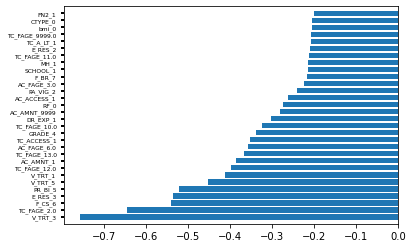

In [ ]:
n = 30 # 상위 몇개를 출력할 것인지
plt.rcParams["font.family"] = "Malgun Gothic"
n_features = datas[:n].shape[1]
plt.barh(range(n), visul['coef'][:n],align='center')
plt.yticks(np.arange(n), visul['col'][:n])
plt.tick_params(axis='y',  labelsize=6, width=2)
plt.ylim(-1, n)
plt.savefig('logistic_coef_ascending_male_2019.png',dpi=400, pad_inches=4.2)

변수별 계수 시각화 (절대값)

In [ ]:
visul = pd.DataFrame()

visul['col'] = datas.columns
visul['coef'] = abs(logistic.coef_)[0,]

visul.sort_values(by = 'coef', inplace = True, ascending=False) # 내림차순

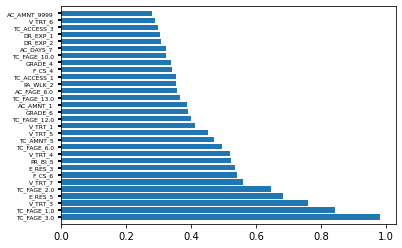

In [ ]:
n = 30 # 상위 몇개를 출력할 것인지
plt.rcParams["font.family"] = "Malgun Gothic"
n_features = datas[:n].shape[1]
plt.barh(range(n), visul['coef'][:n],align='center')
plt.yticks(np.arange(n), visul['col'][:n])
plt.tick_params(axis='y',  labelsize=6, width=2)
plt.ylim(-1, n)
plt.savefig('logistic_coef_abs_male_2019.png',dpi=400, pad_inches=4.2)

# [결정트리]

모델 생성 및 정확도 출력

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 및 학습 시키기
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

#모델 정확도 출력
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.894


변수별 중요도 출력

In [ ]:
visul = pd.DataFrame()

visul['col'] = datas.columns
visul['coef'] = tree.feature_importances_

visul.sort_values(by = 'coef', inplace = True, ascending=False) # 내림차순

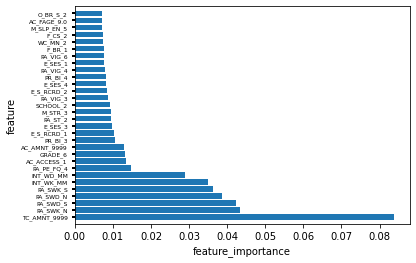

In [ ]:
n = 30 # 상위 몇개를 출력할 것인지
plt.rcParams["font.family"] = "Malgun Gothic"
n_features = datas[:n].shape[1]
plt.barh(range(n), visul['coef'][:n],align='center')
plt.yticks(np.arange(n), visul['col'][:n])
plt.tick_params(axis='y',  labelsize=6, width=2)
plt.xlabel("feature_importance")
plt.ylabel("feature")
plt.ylim(-1, n)
plt.savefig('tree_variable_importance(male)_2019.png',dpi=400, pad_inches=4.2) 

# [랜덤 포레스트]

모델 생성 및 정확도 출력

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# 모델 생성 및 학습 시키기
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# 모델 정확도 출력
predict1 = rf.predict(X_train)
predict2 = rf.predict(X_test)

print("훈련 세트 정확도: {:.3f}".format(accuracy_score(y_train, predict1)))
print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, predict2)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.938


변수별 중요도 출력

In [ ]:
visul = pd.DataFrame()

visul['col'] = datas.columns
visul['coef'] =rf.feature_importances_

visul.sort_values(by = 'coef', inplace = True, ascending=False) # 내림차순

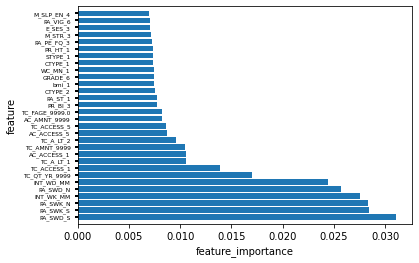

In [ ]:
n = 30 # 상위 몇개를 출력할 것인지
plt.rcParams["font.family"] = "Malgun Gothic"
n_features = datas[:n].shape[1]
plt.barh(range(n), visul['coef'][:n],align='center')
plt.yticks(np.arange(n), visul['col'][:n])
plt.tick_params(axis='y',  labelsize=6, width=2)
plt.xlabel("feature_importance")
plt.ylabel("feature")
plt.ylim(-1, n)
plt.savefig('rf_variable_importance(male)_2019.png',dpi=400, pad_inches=4.2) 